In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from accern_bt.accern_toolbox import *
from pandas import Series
import pandas as pd
import numpy as np
import seaborn
import glob
from pcm_tools.toolbox import *


%matplotlib inline

ModuleNotFoundError: No module named 'accern_bt'

In [3]:
pip install pykalman

     |████████████████████████████████| 228 kB 1.6 kB/s eta 0:00:03
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=9e222329da7f944323513621bb4c1a68398e0aa0fe9a0c054b7ca43d30faee7f
  Stored in directory: /Users/miaoyuesun/Library/Caches/pip/wheels/18/44/0f/af97d6da14881ab826a241f8238f21a9fcd68b260fd8ab7fc3
Successfully built pykalman
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
py.init_notebook_mode(connected=True)

# Important csv files and pre process & plot all data

More economic status/warning indicators:

1. Oil Index (collected: https://fred.stlouisfed.org/series/DCOILWTICO) (important since also mentioned in Ernest's book)
2. Dollar Index (collected: https://fred.stlouisfed.org/series/DTWEXB)
3. Gold Vol Index (collected: https://fred.stlouisfed.org/series/GVZCLS)
4. Moody's Aaa Corporate Bond Index (collected: https://fred.stlouisfed.org/series/DAAA)
5. VIX Index (collected: https://fred.stlouisfed.org/series/VIXCLS)
6. Consumer Confidence Measure (such as the Conference Board’s February survey) with other macro indexes (important, since mentioned also in the Ernest's book)
7. Times of hitting record high by several major stock market indexes
8. Times of market trading price compare with its historical average earnings
9. Years of lasting for the bull market compared with the historical average years of bull market right before each bear market
10. Spread between short and long term T-bill (3-month and 10-year) compared with pre-2008 (collected: https://fred.stlouisfed.org/series/T10Y3M)
11. Job losses index and data: "Unemployment Rate: Job Losers": (collected: https://fred.stlouisfed.org/series/U2RATE)
12. Real Personal Consuming Expenditures including food and energy: (collected: https://fred.stlouisfed.org/series/PCEC96)
13. Real Personal Consuming Expenditures excluding food and energy: (collected: https://fred.stlouisfed.org/series/DPCCRX1M020SBEA)
14. Squeezing corporate profits *very useful in predicting big market drawdown: (collected: https://fred.stlouisfed.org/series/CP)

15. Conference Board’s Leading Economic Index,  which consists of 10 data points that predict future economic performance. 
16. Quarterly GDP slowing down (collected: https://fred.stlouisfed.org/series/GDPC1)
17. Real Manufacturing Output: (Collected: https://fred.stlouisfed.org/series/OUTMS)
18. Servicing segments of the economy: (Collected: https://fred.stlouisfed.org/series/SRVPRD)
19. Major industry leaders' profits turning down for consecutive quarters
20. Wilshire 5000 Total Market Cap Price Index & market valuation: (Collected: https://fred.stlouisfed.org/series/WILL5000PRFC)
    (Collected: https://www.gurufocus.com/stock-market-valuations.php)
21. Financial distress condition index: (collected: https://fred.stlouisfed.org/series/NFCI) 
21. Ones that do best when times are good, such as banks, transportation companies and businesses that sell stuff to consumers that isn’t needed for daily survival.
22. New housing starts: (Collected: https://fred.stlouisfed.org/series/NFCI)
23. A rising market driven by fewer and fewer stocks is a bearish sign. Clues  include more stocks going down than up on a daily basis and more stocks hitting 52-week lows than highs. “It is one of the most reliable bear market warning flags,” says Stack.
24. When the number of stocks hitting their lowest price levels in a year starts to swell, and if the new low list grows day after day, it’s a sign that the "smart money," or professional investors, are bailing out of the market. “It means investors are becoming desperate to sell, even ... at a loss,” Stack says.
25. U.S. Retirement fund
26. Balance Sheet
27. U.S. Weekly Leading Index: (Collected: https://www.quandl.com/data/ECRI/USLEADING-U-S-Weekly-Leading-Index)
28. Household Debt to GDP: (Collected: https://fred.stlouisfed.org/series/HDTGPDUSQ163N?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=categories)
29. US Econ Coincident Index: (Collected: https://www.quandl.com/data/ECRI/USCOIN-U-S-Coincident-Index)
30. Put-call ratio on SPY
31. Fed Reserve sentiment signals: https://www.quantopian.com/posts/does-federal-reserve-sentiment-predict-prices-of-macro-tracking-etfs
32. Inflation level: Trigger of the Feb 3, 2018 market crash
33. Cyclically adjusted price to earnings, https://www.rt.com/op-ed/418057-us-stock-crash-banks/
34. Increasing chatter about impending boom or bust may actually be a good predictor of a coming turning point. (suggested by Robert Schiller (2007), in Ernest's book Quant Trading)
35. Predict volatility regime change (to enter high/low regime) using GARCH model

# Macro_Risk_Indicator_1

In [4]:
start_date = datetime(1985, 1, 1)
end_date = datetime(2018, 2, 8)

In [5]:
ten_yr_rate = ten_yr_rate(start_date, end_date)
three_fin_rate = three_fin_rate(start_date, end_date)
three_nonfin_rate = three_nonfin_rate(start_date, end_date)
three_month_rate = fred_3mon_ir(start_date, end_date)
fed_total_asset = fed_total_asset(start_date, end_date)
high_yield_rate = high_yield_rate(start_date, end_date)
unemployment = unemployment(start_date, end_date)
cpi = cpi(start_date, end_date)
effective_fed_rate = effective_fed_rate(start_date, end_date)
ipi = ipi(start_date, end_date)
m2 = m2(start_date, end_date)
ppi = ppi(start_date, end_date)
gdp = gdp(start_date, end_date)
debt_to_equity = debt_to_equity(start_date, end_date)
pc = put_call(start_date, end_date)
spx = spx(start_date, end_date)

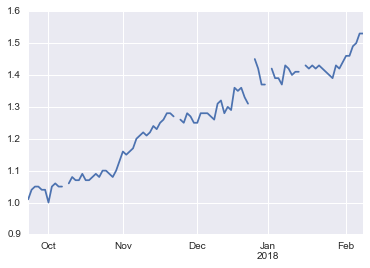

In [10]:
three_month_rate.tail(100).plot()

In [20]:
spread = ten_yr_rate - three_month_rate

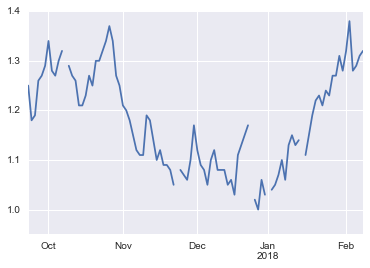

In [21]:
spread.tail(100).plot()

In [13]:
three_rate

1985-01-01    7.76
1985-02-01    8.27
1985-03-01    8.52
1985-04-01    7.95
1985-05-01    7.48
1985-06-01    6.95
1985-07-01    7.08
1985-08-01    7.14
1985-09-01    7.10
1985-10-01    7.16
1985-11-01    7.24
1985-12-01    7.10
1986-01-01    7.07
1986-02-01    7.06
1986-03-01    6.56
1986-04-01    6.06
1986-05-01    6.15
1986-06-01    6.21
1986-07-01    5.83
1986-08-01    5.53
1986-09-01    5.21
1986-10-01    5.18
1986-11-01    5.35
1986-12-01    5.53
1987-01-01    5.43
1987-02-01    5.59
1987-03-01    5.59
1987-04-01    5.64
1987-05-01    5.66
1987-06-01    5.67
              ... 
2015-08-01    0.07
2015-09-01    0.02
2015-10-01    0.02
2015-11-01    0.12
2015-12-01    0.23
2016-01-01    0.26
2016-02-01    0.31
2016-03-01    0.29
2016-04-01    0.23
2016-05-01    0.27
2016-06-01    0.27
2016-07-01    0.30
2016-08-01    0.30
2016-09-01    0.29
2016-10-01    0.33
2016-11-01    0.45
2016-12-01    0.51
2017-01-01    0.51
2017-02-01    0.52
2017-03-01    0.74
2017-04-01    0.80
2017-05-01  

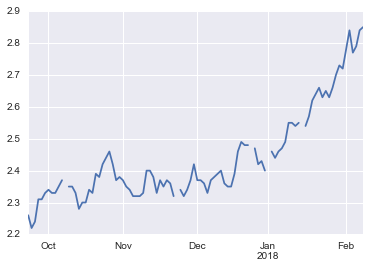

In [22]:
ten_yr_rate.tail(100).plot()

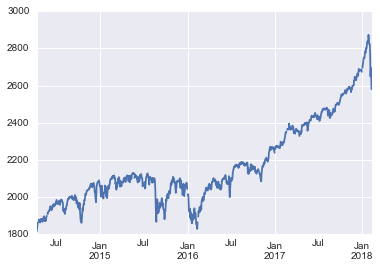

In [18]:
spx.tail(1000).plot()

In [5]:
unemployment = unemployment/100

In [80]:
rate_spread = ten_yr_3_month_rate_sprd(start_date, end_date)
floating_scaled_risk_prob_1 = (rate_spread -rate_spread.min())/(rate_spread.max()-rate_spread.min())
risk_inidicator_1_df = pd.DataFrame(floating_scaled_risk_prob_1, columns=['safety_level'])

In [81]:
# Initialize a Kalman Filter.
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [67]:
risk_inidicator_1_df

,safety_level
1985-01-01,NaN
1985-01-02,0.943983
1985-01-03,0.933610
1985-01-04,0.941909
1985-01-07,0.910788
1985-01-08,0.900415
1985-01-09,0.927386
1985-01-10,0.919087
1985-01-11,0.937759
1985-01-14,0.952282


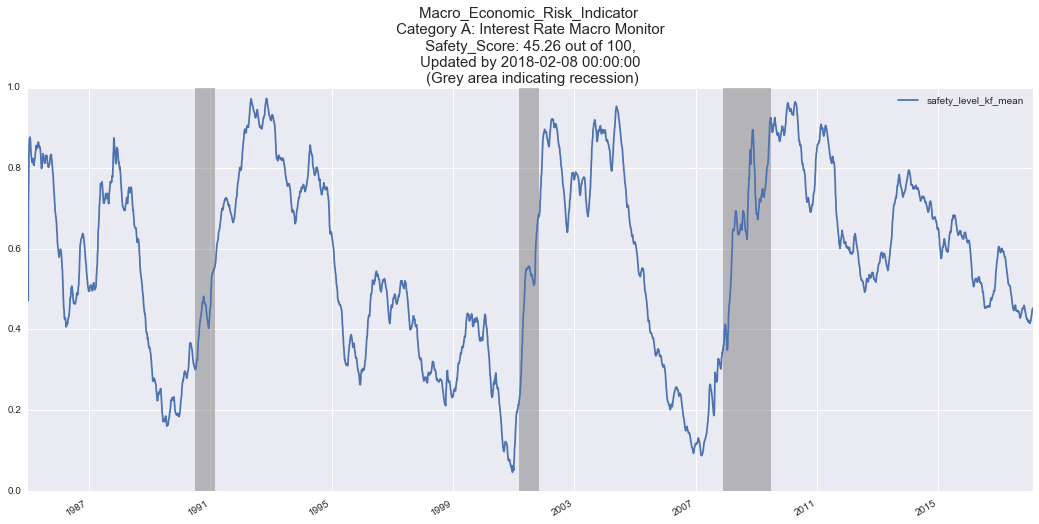

In [82]:
# Filter Rolling Means
safety_level_kf_mean, _ = kf.filter(risk_inidicator_1_df.safety_level.dropna())
# Create another column to be the kalman filter value
risk_inidicator_1_df.dropna(inplace=True)
risk_inidicator_1_df['safety_level_kf_mean'] = safety_level_kf_mean
del risk_inidicator_1_df['safety_level']

a = datetime(2007,12,1)
b = datetime(2009,7,1)
c = datetime(2001, 3, 1)
d = datetime(2001, 11, 1)
e = datetime(1990, 7, 1)
f = datetime(1991, 3, 1)

risk_inidicator_1_df.plot(figsize=(18, 8))
plt.axvspan(a, b, color='grey', alpha=0.5, lw=0)
plt.axvspan(c, d, color='grey', alpha=0.5, lw=0)
plt.axvspan(e, f, color='grey', alpha=0.5, lw=0)

# plt.axhline(0.6, color = 'green', lw = 2, ls= '--', label='Safety Level: High')
# plt.axhline(0.4, color = 'orange', lw = 2, ls = '--', label='Safety Level: Medium')
# plt.axhline(0.2, color = 'red', lw = 2, ls = '--', label = 'Safety Level: Low')

# line1 = plt.axhline(0.6, color = 'green', lw = 2, ls= '--', label='Safety Level: High')
# line2 = plt.axhline(0.4, color = 'orange', lw = 2, ls = '--', label='Safety Level: Medium')
# line3 = plt.axhline(0.2, color = 'red', lw = 2, ls = '--', label = 'Safety Level: Low')
# plt.legend(handles = [line1])
# plt.legend(handles = [line2])
# plt.legend(['Indicator Value', 'Safety Level: High', 'Safety Level: Medium', 'Safety Level: Low'])
plt.title('Macro_Economic_Risk_Indicator \n \
Category A: Interest Rate Macro Monitor \n Safety_Score: {:.2f} out of 100, \n Updated by {} \n (Grey area indicating recession)'.format(risk_inidicator_1_df['safety_level_kf_mean'][-1]*100, risk_inidicator_1_df.index[-1]), fontsize = 15);

In [137]:
risk_inidicator_1_df

,safety_level
1985-01-01,NaN
1985-01-02,0.943983
1985-01-03,0.933610
1985-01-04,0.941909
1985-01-07,0.910788
1985-01-08,0.900415
1985-01-09,0.927386
1985-01-10,0.919087
1985-01-11,0.937759
1985-01-14,0.952282


In [139]:
risk_inidicator_1_df_ema_126 = risk_inidicator_1_df['safety_level'].ewm(span = 126).mean()
risk_inidicator_1_df_ema_252 = risk_inidicator_1_df['safety_level'].ewm(span = 252).mean()
spy_df_adj_close = spy_df['Adj Close']

In [142]:
int_rate_risk_diff = risk_inidicator_1_df_ema_126 - risk_inidicator_1_df_ema_252

In [146]:
plot__1 = go.Scatter(x=risk_inidicator_1_df.index, y=risk_inidicator_1_df_ema_126, name = 'int_rate_spread_ema_126')
plot__2 = go.Scatter(x=risk_inidicator_1_df.index, y=risk_inidicator_1_df_ema_252, name = 'int_rate_spread_ema_252')
plot__3 = go.Scatter(x=risk_inidicator_1_df.index, y=int_rate_risk_diff, name = 'int_rate_risk')
# plot__4 = go.Scatter(x=risk_inidicator_1_df.index, y=spy_df_adj_close, name = 'spy')


data = [plot_1, plot_2, plot_3]
layout = go.Layout(
   title='Int Rate Spread 3 month/10 yr',
   yaxis=dict(
       title='Int Rate'
   )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='styling-names')

C:\Users\Brad Sun\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `styling-names` didn't end with .html. Adding .html to the end of your file.



In [4]:
# First step to proceed:

# 1. Frequency -> distribution
# 2. Test normal distribution.
# 3. 

# Unemployment Rate Analysis

In [23]:
spy_df = get_yahoo_data_single('SPY', start_date, end_date)
unempt_df = pd.DataFrame(unemployment)

[*********************100%***********************]  1 of 1 downloaded

In [24]:
# spy_df['SPY'] = spy_df['Adj Close']
# spy_df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
unempt_df.columns = ['Unemployment']

In [25]:
print (unemployment[0])

7.3


In [26]:
unempt_df['unempt_df_60_ema'] = unempt_df['Unemployment'].ewm(span=60).mean()
unempt_df['unempt_df_12_ema'] = unempt_df['Unemployment'].ewm(span=12).mean()

In [28]:
unempt_df

,Unemployment,unempt_df_60_ema,unempt_df_12_ema
1985-01-01,7.3,7.300000,7.300000
1985-02-01,7.2,7.249167,7.245833
1985-03-01,7.2,7.232228,7.227945
1985-04-01,7.3,7.250028,7.250690
1985-05-01,7.2,7.239344,7.236917
1985-06-01,7.4,7.268400,7.276555
1985-07-01,7.4,7.289132,7.304101
1985-08-01,7.1,7.262642,7.261509
1985-09-01,7.1,7.242069,7.229556
1985-10-01,7.1,7.225638,7.205006


In [30]:
unempt_spread = unempt_df['unempt_df_60_ema'] - unempt_df['unempt_df_12_ema']

In [42]:
momentum_score = unempt_spread.pct_change()

In [45]:
momentum_score[-1]

-0.0076651391033982774

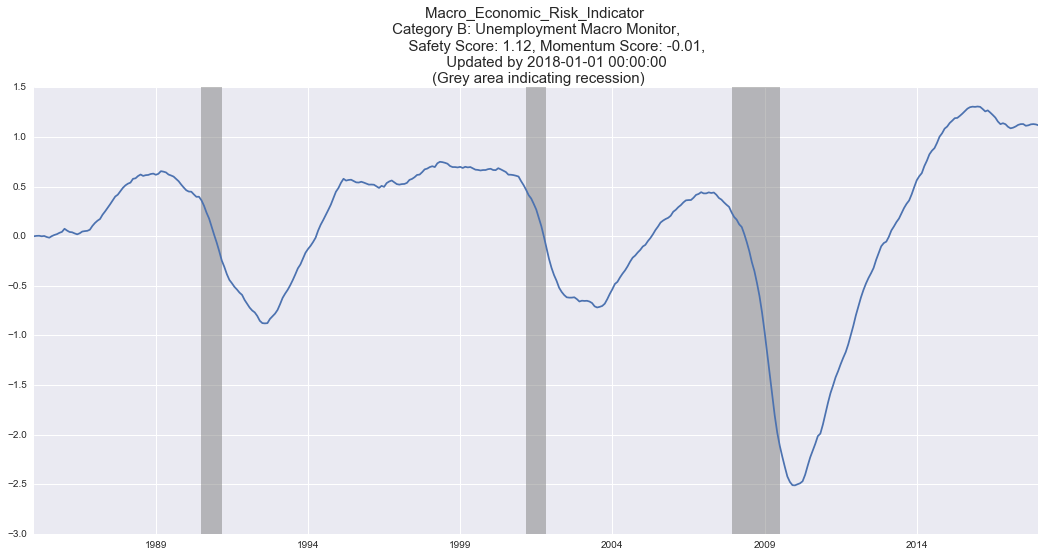

In [48]:
# Econ crisis 1:
a = datetime(2007,12,1)
b = datetime(2009,7,1)

# Econ crisis 2:
c = datetime(2001, 3, 1)
d = datetime(2001, 11, 1)

# Econ crisis 3:
e = datetime(1990, 7, 1)
f = datetime(1991, 3, 1)


unempt_spread.plot(figsize=(18, 8))
plt.axvspan(a, b, color='grey', alpha=0.5, lw=0)
plt.axvspan(c, d, color='grey', alpha=0.5, lw=0)
plt.axvspan(e, f, color='grey', alpha=0.5, lw=0)

# plt.axhline(0.6, color = 'green', lw = 2, ls= '--', label='Safety Level: High')
# plt.axhline(0.4, color = 'orange', lw = 2, ls = '--', label='Safety Level: Medium')
# plt.axhline(0.2, color = 'red', lw = 2, ls = '--', label = 'Safety Level: Low')

# line1 = plt.axhline(0.6, color = 'green', lw = 2, ls= '--', label='Safety Level: High')
# line2 = plt.axhline(0.4, color = 'orange', lw = 2, ls = '--', label='Safety Level: Medium')
# line3 = plt.axhline(0.2, color = 'red', lw = 2, ls = '--', label = 'Safety Level: Low')
# plt.legend(handles = [line1])
# plt.legend(handles = [line2])
# plt.legend(['Indicator Value'])


plt.title('Macro_Economic_Risk_Indicator \n Category B: Unemployment Macro Monitor, \n \
          Safety Score: {:.2f}, Momentum Score: {:.2f}, \n \
          Updated by {} \n (Grey area indicating recession)'.format(unempt_spread[-1], momentum_score[-1], unempt_spread.index[-1]), fontsize = 15);

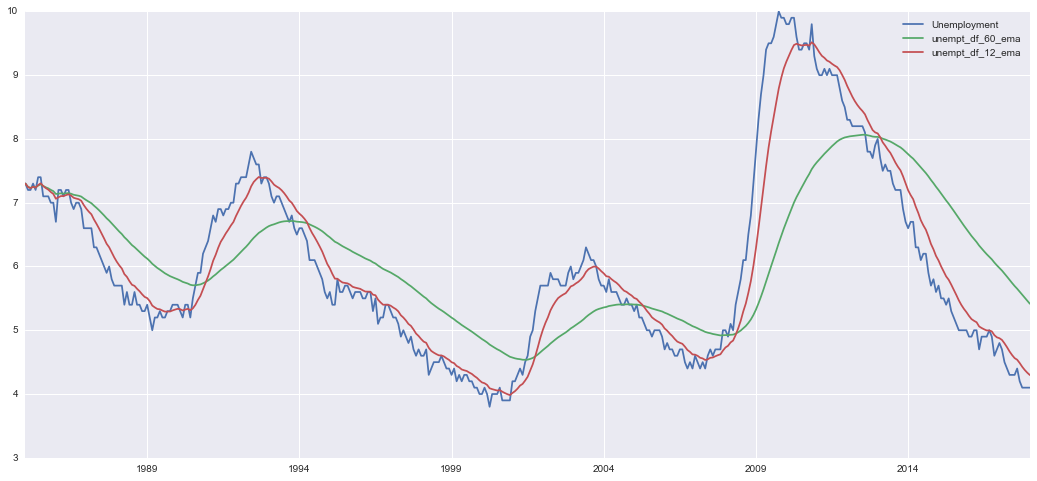

In [27]:
unempt_df.plot(figsize=(18, 8))

In [133]:
risk_level_score_diff = unempt_df['unempt_df_60_ema'] - unempt_df['unempt_df_12_ema']

In [134]:
# plot using iplot function to generate a more interactive plotting interface.
plot_1 = go.Scatter(x=unempt_df.index, y=unempt_df['unempt_df_60_ema'], name = 'unempt_df_60_ema')
plot_2 = go.Scatter(x=unempt_df.index, y=unempt_df['unempt_df_12_ema'], name = 'unempt_df_12_ema')
plot_3 = go.Scatter(x=unempt_df.index, y=risk_level_score_diff, name = 'unemployment_risk_level_score')


data = [plot_1, plot_2, plot_3]
layout = go.Layout(
   title='Unemplotment Rate Ema 12 Months VS 60 Months',
   yaxis=dict(
       title='Employment Rate'
   )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='styling-names')


C:\Users\Brad Sun\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `styling-names` didn't end with .html. Adding .html to the end of your file.



## Plot SPY and Macro indicator together on one chart

In [11]:
current_scaled_risk_prob = (rate_spread[-1]-rate_spread.min())/(rate_spread.max()-rate_spread.min())

In [20]:
current_scaled_prob/1

0.41286307053941906

In [5]:
database = [ten_yr_rate,
        three_fin_rate,
        three_nonfin_rate,
        three_rate,
        fed_total_asset,
        high_yield_rate,
        spx,
        unemployment,
        cpi,
        effective_fed_rate,
        ipi,
        m2,
        ppi,
        gdp,
        debt_to_equity,
        pc,
        rate_spread]


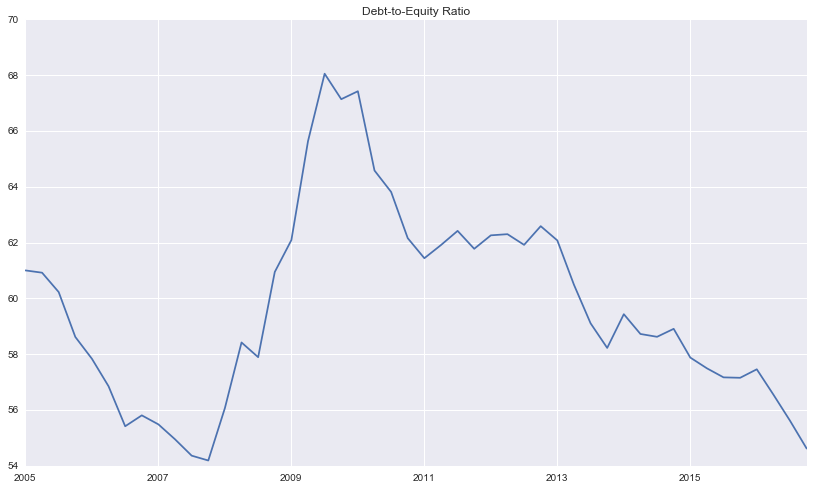

In [6]:
debt_to_equity.plot(figsize = (14, 8))
plt.title('Debt-to-Equity Ratio')

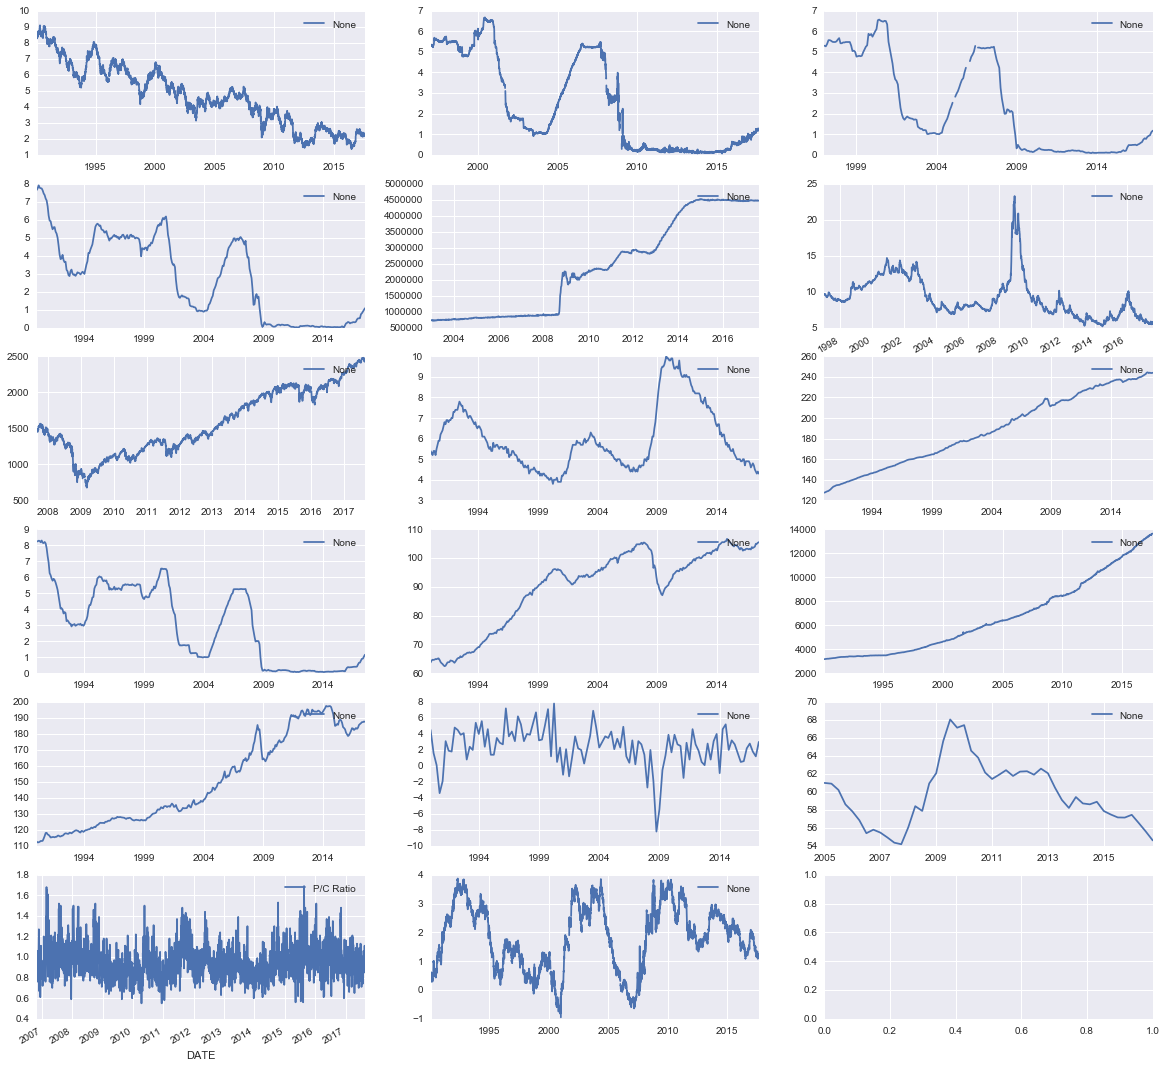

In [7]:
col = 3
row = 6
plot_row = -1

fig, axes = plt.subplots(6, 3, sharex=False, sharey=False, figsize = (20,20))
for i, dt in enumerate(database):
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    dt.plot(ax = axes[plot_row, axes_col]).legend()

In [7]:
from pcm_tools.techindicators.ema import series_ema

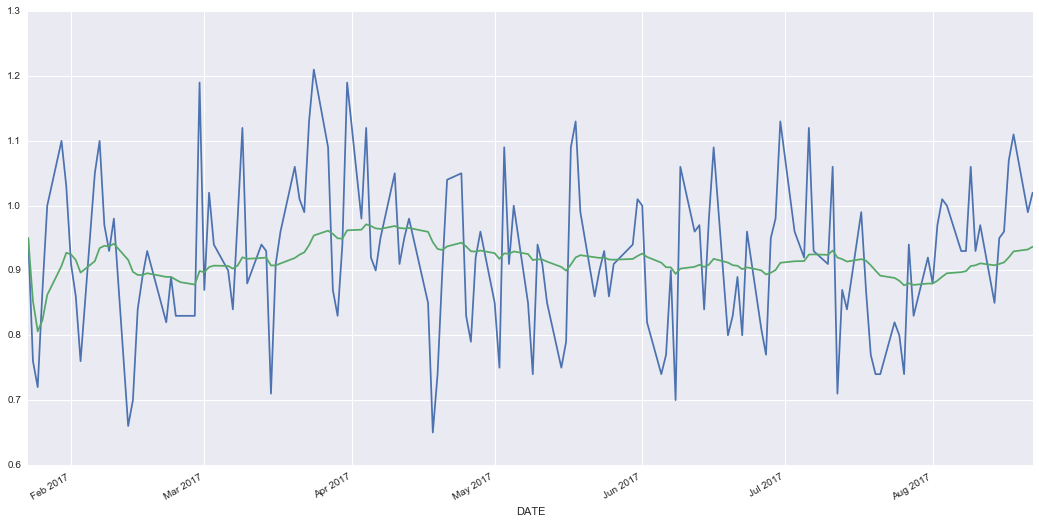

In [8]:
pc.plot(figsize = (18, 9))
series_ema(pc, 40).plot(figsize = (18, 9))

In [9]:
pc.pct_change().corr(spx.pct_change())

-0.34499018471387832

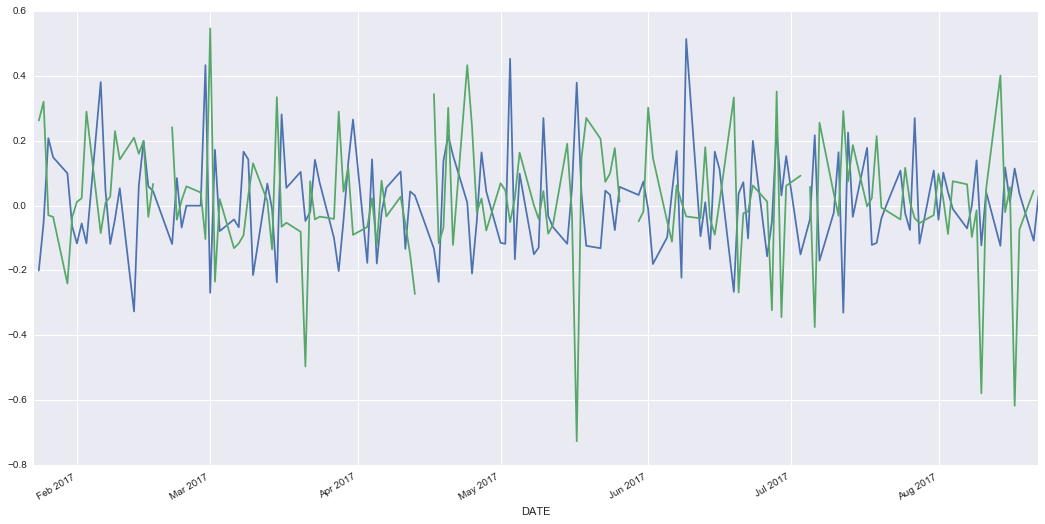

In [14]:
pc.pct_change().plot(figsize = (18, 9))
(spx.pct_change()*40).plot(figsize = (18, 9)) # green

In [34]:
pc_ema_chg = series_ema(pc.pct_change(), 10)
spx_chg = spx.pct_change()*5

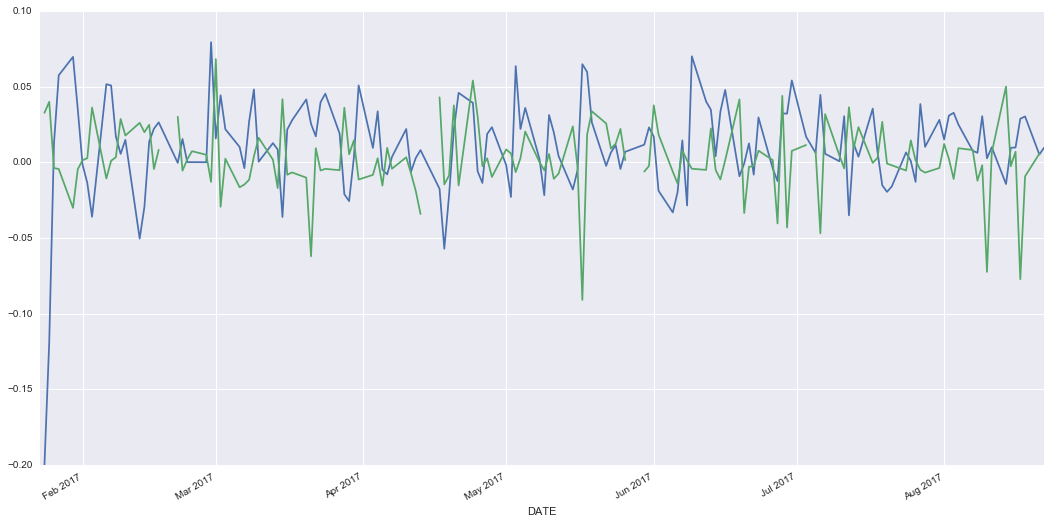

In [35]:
pc_ema_chg.plot(figsize = (18, 9))
spx_chg.plot(figsize = (18, 9)) # green

In [31]:
pc_ema_chg.corr(spx_chg)

-0.30792175144197653

## Prep all the csv data the files in the folder

### Scan all csv files in the folder

In [4]:
# Step 1: put all csv files into the root folder and scan all files to find names
# glob.glob('*.csv')

### Name all economic indicators matching the files

In [445]:
# Remember, all data in the csv files are originally non-dates or non-floats, so we need to clean or pre-process all these data
# Below the code shows how to parse all string of the dates in the original file into "date" type 

# Assign each name to each file

ten_yr_rate = pd.read_csv('10-Year Treasury Constant Maturity Rate (DGS10).csv', parse_dates = ['DATE'])
three_fin_rate = pd.read_csv('3-Month AA Financial Commercial Paper Rate (DCPF3M).csv', parse_dates = ['DATE'])
three_nonfin_rate = pd.read_csv('3-Month AA Nonfinancial Commercial Paper Rate (CPN3M).csv', parse_dates = ['DATE'])
three_rate = pd.read_csv('3-Month Treasury Bill Secondary Market Rate (TB3MS).csv', parse_dates = ['DATE'])
fed_total_asset = pd.read_csv('All Federal Reserve Banks Total Assets (WALCL).csv', parse_dates = ['DATE'])
high_yield_rate = pd.read_csv('BofA Merrill Lynch US High Yield Effective Yield© (BAMLH0A0HYM2EY).csv', parse_dates = ['DATE'])
spx = pd.read_csv('usspx.csv', parse_dates = ['DATE'])
unemployment = pd.read_csv('Civilian Unemployment Rate (UNRATE).csv', parse_dates = ['DATE'])
cpi = pd.read_csv('Consumer Price Index for All Urban Consumers All Items (CPIAUCSL).csv', parse_dates = ['DATE'])
effective_fed_rate = pd.read_csv('Effective Federal Funds Rate (FEDFUNDS).csv', parse_dates = ['DATE'])
ipi = pd.read_csv('Industrial Production Index (INDPRO).csv', parse_dates = ['DATE'])
m2 = pd.read_csv('M2 Money Stock (M2).csv', parse_dates = ['DATE'])
ppi = pd.read_csv('Producer Price Index by Industry Total Manufacturing Industries(PCUOMFGOMFG).csv', parse_dates = ['DATE'])
gdp = pd.read_csv('Real Gross Domestic Product (A191RL1Q225SBEA).csv', parse_dates = ['DATE'])
debt_to_equity = pd.read_csv('Total Debt to Equity for United States© (TOTDTEUSQ163N).csv', parse_dates = ['DATE'])
pc = pd.read_csv('')

### Set the first column "DATE" as the index

In [446]:
ten_yr_rate.set_index('DATE', inplace=True)
three_fin_rate.set_index('DATE', inplace=True)
three_nonfin_rate.set_index('DATE', inplace=True)
three_rate.set_index('DATE', inplace=True)
fed_total_asset.set_index('DATE', inplace=True)
high_yield_rate.set_index('DATE', inplace=True)
spx.set_index('DATE', inplace = True)
unemployment.set_index('DATE', inplace=True)
cpi.set_index('DATE', inplace = True)
effective_fed_rate.set_index('DATE', inplace=True)
ipi.set_index('DATE', inplace=True)
m2.set_index('DATE', inplace=True)
ppi.set_index('DATE', inplace=True)
gdp.set_index('DATE', inplace=True)
debt_to_equity.set_index('DATE', inplace = True)

In [450]:
print (pd.infer_freq(m2.index))

W-MON


In [449]:
print (pd.infer_freq(spx.index))

None


### Handle individual data files by hand

In [437]:
# clean the data for spx because it has more than dates and values (adjusted close price)
spx = spx.drop(['Volume', 'Open', 'High', 'Low', 'Close'], axis = 1)

### Initially concat all data files into one csv file with the messed-up dataframe

In [438]:
allFiles = glob.glob('*.csv')
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    csv = pd.read_csv(file_)
    list_.append(csv)
    
frame = pd.concat(list_)

In [439]:
# messed-up dataframe without titles
frame

,Close,DATE,High,Low,Open,Spx,Unnamed: 2,Unnamed: 3,Volume,cpi,...,gdp,high_yield_rate,ipi,m2,ppi,ten_yr_rate,three_fin_rate,three_nonfin_rate,three_rate,unemployment
0,NaN,1/2/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.06,NaN,NaN,NaN,NaN
1,NaN,1/3/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.03,NaN,NaN,NaN,NaN
2,NaN,1/4/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.99,NaN,NaN,NaN,NaN
3,NaN,1/5/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.02,NaN,NaN,NaN,NaN
4,NaN,1/8/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.03,NaN,NaN,NaN,NaN
5,NaN,1/9/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN
6,NaN,1/10/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.07,NaN,NaN,NaN,NaN
7,NaN,1/11/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.08,NaN,NaN,NaN,NaN
8,NaN,1/12/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.08,NaN,NaN,NaN,NaN
9,NaN,1/15/1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [105]:
#frame.shape

In [104]:
# to locate a certain column in a dataframe 
# df.iloc[:, 1]

In [106]:
# delete a column:
# with a known name: frame.drop('Unnamed: 3', axis = 1, inplace = True)
# delete a list of columns: 

# frame = frame.drop(['Unnamed: 2', 'Unnamed: 3'], axis = 1)

## Clean data in the dataframes for them to be plotted

### Add titles into the dataframe "frame"

In [440]:
total = pd.concat([ten_yr_rate, three_fin_rate, three_nonfin_rate, three_rate, 
                   fed_total_asset, high_yield_rate, unemployment, cpi, effective_fed_rate, 
                  ipi, m2, ppi, gdp, debt_to_equity, spx], 
                  keys = ['ten_yr_rate', 'three_fin_rate', 'three_nonfin_rate', 'three_rate', 'fed_total_asset', 'high_yield_rate', 'unemployment',
                         'cpi', 'effective_fed_rate', 'ipi', 'm2', 'ppi', 'gdp', 'debt_to_equity', 'spx'], axis = 1)

### Collect all inidividual economic dataframe into a list 

In [441]:
data = [ten_yr_rate, three_fin_rate, three_nonfin_rate, three_rate, 
                   fed_total_asset, high_yield_rate, unemployment, cpi, effective_fed_rate, 
                  ipi, m2, ppi, gdp, debt_to_equity, spx]

### To-be-solved problem for each individual economic dataframe: 

1) dataframe values' dtype is not float, means cannot be plotted 

2) there are '.' in the series

### Try to write for loop to solve the two problems above

In [442]:
# write for loop to clean and pre-process the data:
data_collect = []


for i in data:
    # e.g. ten_yr_rate['ten_yr_rate'] = ten_yr_rate['ten_yr_rate'].replace('.', np.NaN)
    i.iloc[:, 0] = i.iloc[:, 0].replace('.', np.NaN)
    i.iloc[:, 0] = i.iloc[:, 0].replace('null', np.NaN)
    # e.g. ten_yr_rate['ten_yr_rate'] = ten_yr_rate['ten_yr_rate'].astype(float)
    i = i.iloc[:, 0].astype(float)
    data_collect.append(i)
    
    print (i)

DATE
1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
1962-01-09    4.05
1962-01-10    4.07
1962-01-11    4.08
1962-01-12    4.08
1962-01-15    4.10
1962-01-16    4.13
1962-01-17    4.12
1962-01-18    4.11
1962-01-19    4.11
1962-01-22    4.09
1962-01-23    4.11
1962-01-24    4.10
1962-01-25    4.11
1962-01-26    4.11
1962-01-29    4.12
1962-01-30    4.11
1962-01-31    4.10
1962-02-01    4.09
1962-02-02    4.08
1962-02-05    4.07
1962-02-06    4.06
1962-02-07    4.07
1962-02-08    4.07
1962-02-09    4.05
1962-02-12     NaN
              ... 
2017-04-19    2.21
2017-04-20    2.24
2017-04-21    2.24
2017-04-24    2.28
2017-04-25    2.35
2017-04-26    2.32
2017-04-27    2.30
2017-04-28    2.29
2017-05-01    2.33
2017-05-02    2.29
2017-05-03    2.33
2017-05-04    2.36
2017-05-05    2.36
2017-05-08    2.39
2017-05-09    2.42
2017-05-10    2.41
2017-05-11    2.39
2017-05-12    2.33
2017-05-15    2.34
2017-05-16    2.33
2017-05-17    2.22
2017-05

None


### After pre processing the data into plottable data, write for loop to plot all 15 economic indicators in a organized way

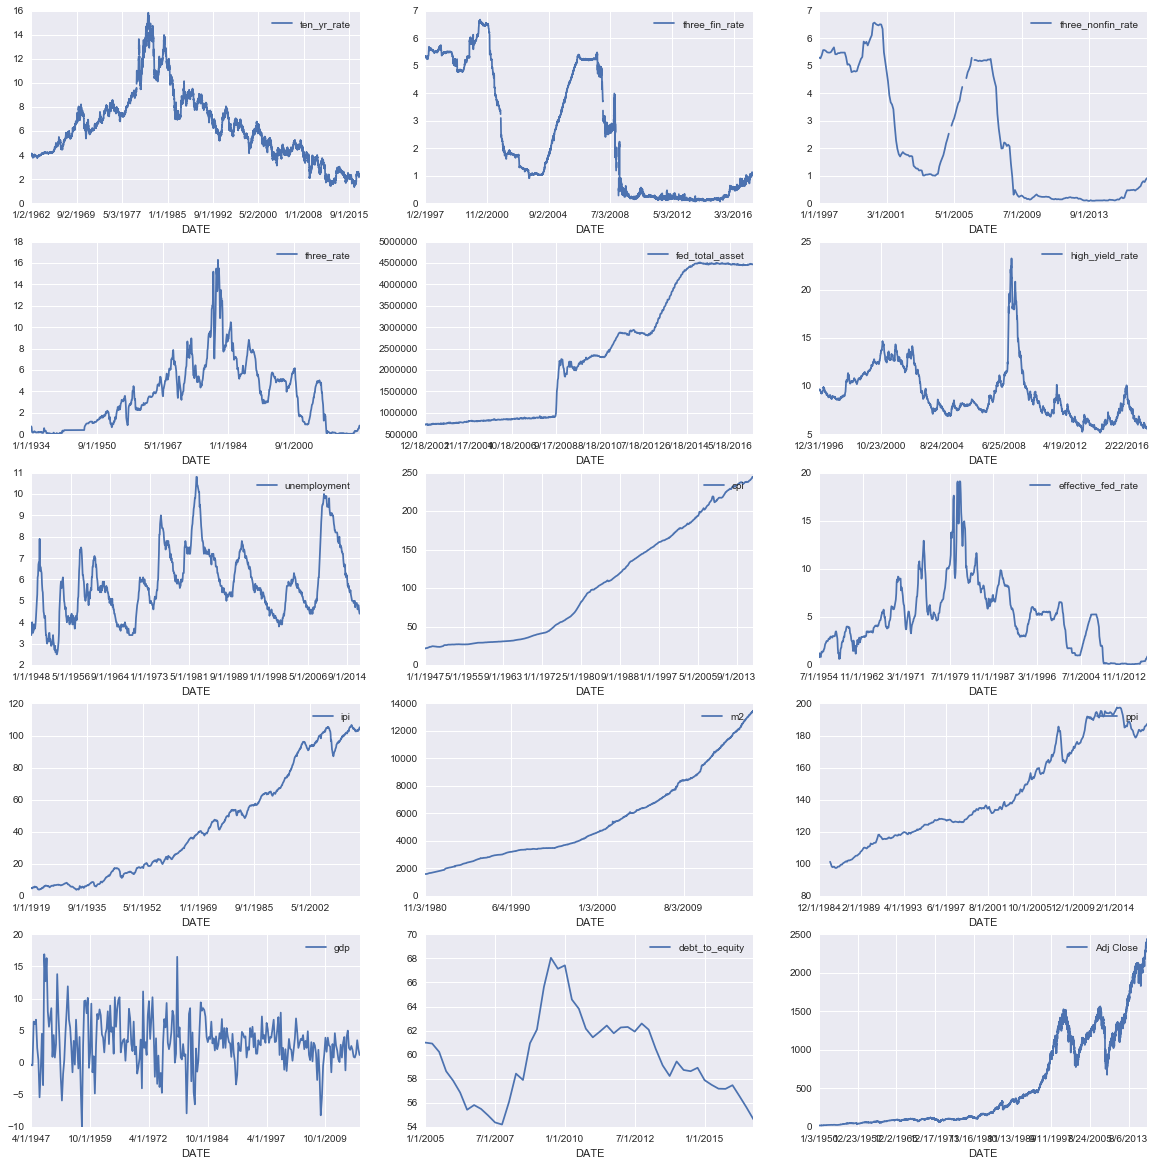

In [258]:
col = 3
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 3, sharex=False, sharey=False, figsize = (20,20))
for i, dt in enumerate(data_collect):
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    dt.plot(ax = axes[plot_row, axes_col]).legend()

In [387]:
# If I want y rows and x columns to be plotted, set col = x, row = y, plot_row = -1 and set axes_col = i % col
# These lines below show what axes_row shows

"""

col = 2
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize = (20,20))
for i, dt in enumerate(data_collect):
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    print (axes_col)
    
""" 

'\ncol = 2\nrow = 5\nplot_row = -1\n\nfig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize = (20,20))\nfor i, dt in enumerate(data_collect):\n    axes_col = i % col\n    if axes_col == 0:\n        plot_row +=1\n    print (axes_col)\n    \n'

# Analysis of the correlation between economic indicators with SPX 

## Handle the different frequency of each economic data

### Define or clarify each frequency for each econmic indicator by hand

In [259]:
""" 

ts = Series(data_collect[14], index = pd.date_range('1962-1-2', '2017-5-1', freq = 'W-FRI'))
df = pd.DataFrame(ts)
print (df)

"""

" ts1 = Series(np.random.randn(3),\n            index = pd.date_range('2012-6-13', periods = 3, freq = 'W-WED'))\nts1\n\n"

In [ ]:
ts = Series(data_collect[14], index = pd.date_range('1962-1-2', '2017-5-1', freq = 'W-FRI'))
df = pd.DataFrame(ts)
print (df)

### See what frequency of each economic indicator

In [466]:
# Remember pd.infer_freq is not perfect in this case, e.g. I have to mannually set some freqs to certain data
for dt in data_collect:
    # define spx's index freq to be 'B': (data_collect[14])
    data_collect[14] = Series(data_collect[14], index = pd.date_range('1962-1-2', '2017-5-1', freq = 'B'))
    # define high_yield_rate's index freq to be 'B': (data_collect[5])
    data_collect[5] = Series(data_collect[5], index = pd.date_range('1996-12-31', '2017-5-1', freq = 'B'))
    collect = pd.infer_freq(dt.index)
    print (collect)

B
B
MS
MS
W-WED
B
MS
MS
MS
MS
W-MON
MS
QS-OCT
QS-OCT
B


Attention: We found that the last SPX doesn't have frequency, so we need to define its frequency to be "B"

### Convert Frequency of each indicator to the same

In [493]:
"""

The ago here to calculate the change % from each period:

(Today's return/Yesterday's Return) - 1
ts / ts.shift(1) - 1

or 

ts.pct_change()


"""


"\n\nThe ago here to calculate the change % from each period:\n\n(Today's return/Yesterday's Return) - 1\nts / ts.shift(1) - 1\n\nor \n\nts.pct_change()\n\n\n"

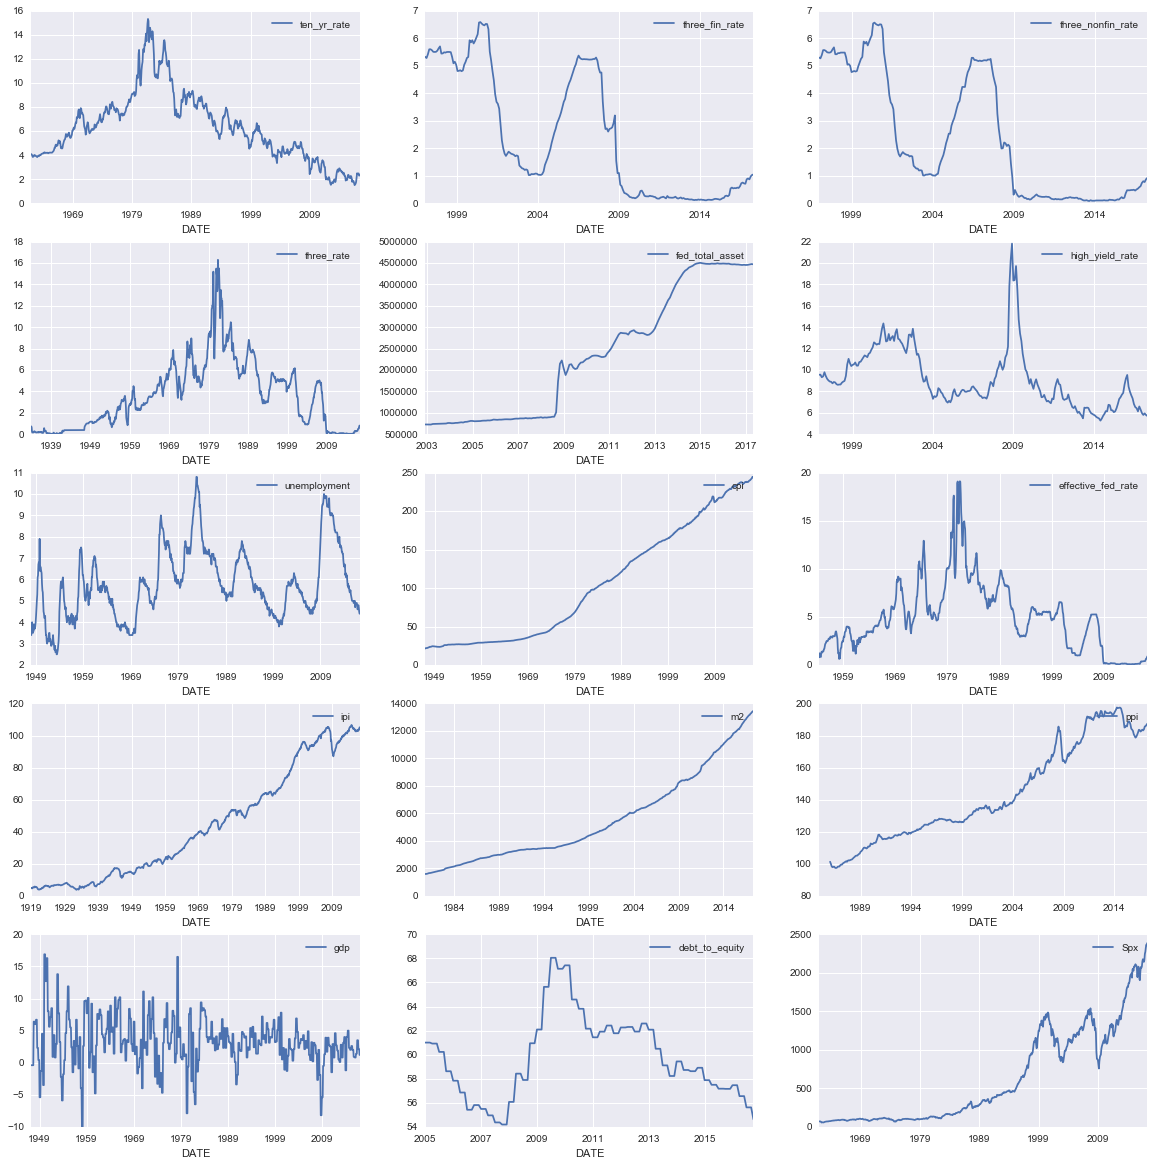

In [505]:
# Convert all frequency to monthly data:

col = 3
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 3, sharex=False, sharey=False, figsize = (20,20))
for i, dt in enumerate(data_collect):
    dt = dt.resample('M').mean()
    data_collect[2] = data_collect[2].fillna(method='pad') # pay attention also to possible mistaken reverse filling caused by index problem 
    data_collect[12] = data_collect[12].resample('M').ffill()
    data_collect[13] = data_collect[13].resample('M').ffill()
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    dt.plot(ax = axes[plot_row, axes_col]).legend()

### Plot the monthly return of each indicator since 2001-1-1 

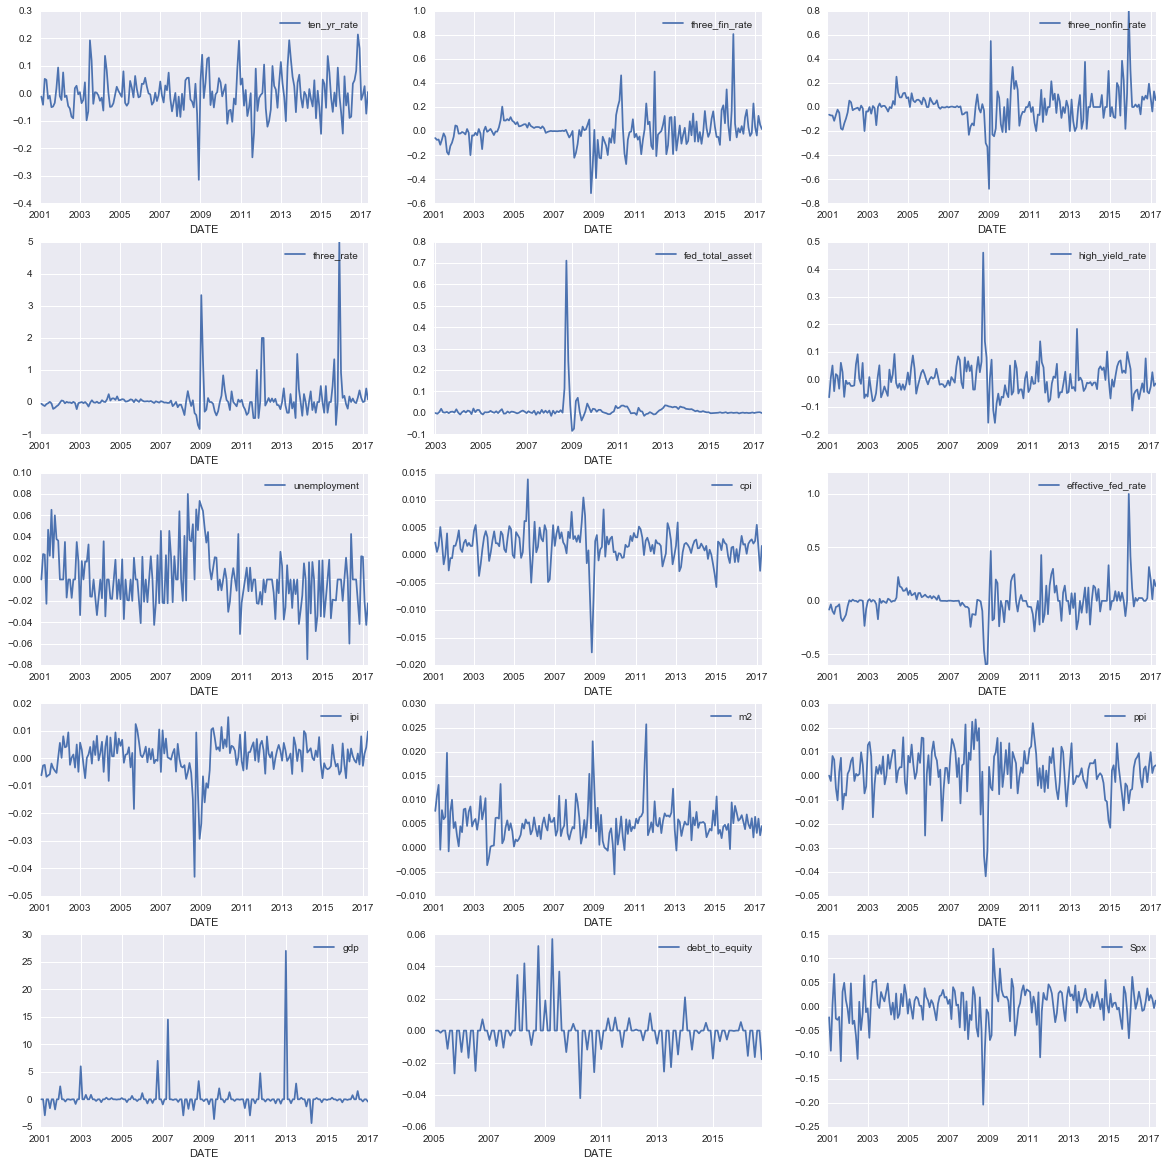

In [512]:
col = 3
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 3, sharex=False, sharey=False, figsize = (20,20))

for i, dt in enumerate(data_collect):
    dt = dt.resample('M').mean()
    data_collect[2] = data_collect[2].fillna(method='pad') # pay attention also to possible mistaken reverse filling caused by index problem 
    data_collect[12] = data_collect[12].resample('M').ffill()
    data_collect[13] = data_collect[13].resample('M').ffill()
    pct = dt['2001-1-1':].pct_change()
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    pct.plot(ax = axes[plot_row, axes_col]).legend()
    

### Plot the correlation between each indicator with the SPX

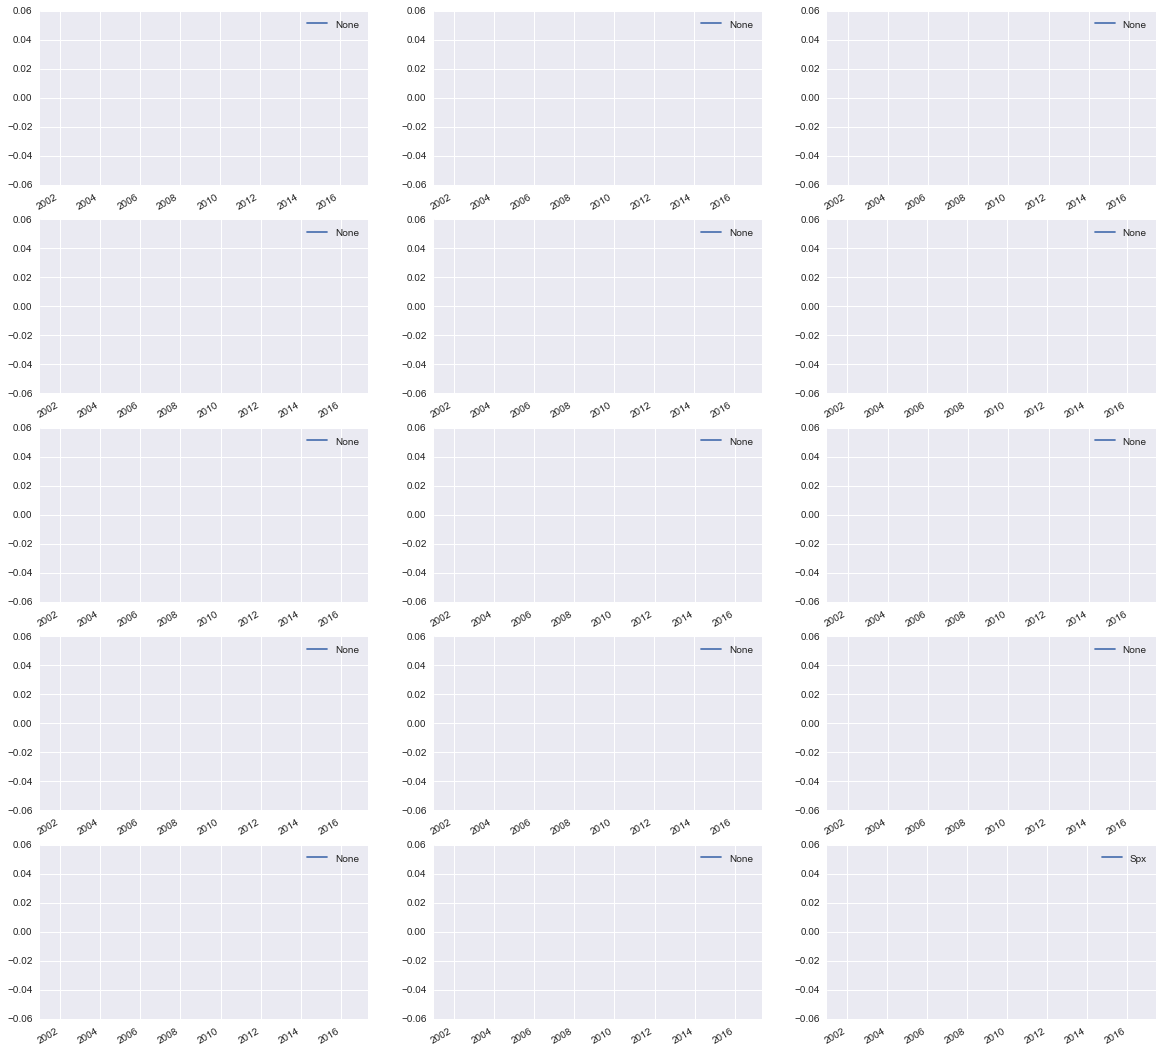

In [515]:
col = 3
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 3, sharex=False, sharey=False, figsize = (20,20))

for i, dt in enumerate(data_collect):
    dt = dt.resample('M').mean()
    data_collect[2] = data_collect[2].fillna(method='pad') # pay attention also to possible mistaken reverse filling caused by index problem 
    data_collect[12] = data_collect[12].resample('M').ffill()
    data_collect[13] = data_collect[13].resample('M').ffill()
    pct = dt['2001-1-1':].pct_change()
    spx_pct = data_collect[14]['2001-1-1':].pct_change()
    corr_ = pct.shift(1).rolling(window = 10).corr(spx_pct)
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    corr_.plot(ax = axes[plot_row, axes_col]).legend()
    
# not working for now

### Scan and filter high absolute correlations with SPX since 2000-1-1based on rolling windows =1, 3, 6, 12 months

In [641]:

for i, dt in enumerate(data_collect):
    data_collect[2] = data_collect[2].fillna(method='pad') 
    data_collect[12] = data_collect[12].resample('M').mean()
    data_collect[13] = data_collect[13].resample('M').mean()
    dt = dt.resample('M').mean()
    all_3month = dt.rolling(window = 12).mean() # use window = 3 because I want to use rolling timeframes based on quarters
    spx_3month = data_collect[14].resample('M').mean().rolling(window = 12).mean()
    
    all_3month_pct = all_3month['1980-1-1':].pct_change()
    spx_3month_pct = spx_3month['1980-1-1':].pct_change()
    
    print (all_3month_pct.shift(1).corr(spx_3month_pct))
    # corr_.rolling(window = 20).mean().plot(ax = axes[plot_row, axes_col])
# pct is good
# spx_pct is good
# corr_ is good
# rolling_corr is good


"""

when: rolling(window = 1)

-0.104042233787
-0.106045545098
-0.0596983253249
-0.0747167042249
-0.188969086692
-0.133302278588
0.0223158737499
-0.0934873842058
-0.0745131280792
0.0240270219521
-0.0285674125786
-0.0143884853895
-0.0586521848253
-0.0381845423821
0.253873701927



when: rolling(window = 3)

0.0116891990409
-0.0559331989882
0.0418637790266
0.0495107340188
-0.496628258664
-0.56270113827
-0.144340314552
-0.0188523470689
0.0708860790696
0.117420277075
-0.109720161726
0.095115867978
0.1115801463
-0.196843140487
0.750263543376


when: rolling(window = 6)

0.10885614598
0.045591162189
0.13279049341
0.131307069889
-0.634074021523
-0.639148702555
-0.256917401748
0.0342094367631
0.192917967018
0.254793224537
-0.129379148144
0.155453543067
0.186097202082
-0.302997976697
0.883557854452



when: rolling(window = 12)

0.0774427911569
0.214707139863
0.263248247635
0.166028533889
-0.646009200729
-0.583453462392
-0.400230265999
0.00930927056943
0.263548739216
0.408334823927
-0.131406936436
0.0996068331464
-0.00291719590533
-0.577708029819
0.946720229173


"""

0.0774427911569
0.214707139863
0.263248247635
0.166028533889
-0.646009200729
-0.583453462392
-0.400230265999
0.00930927056943
0.263548739216
0.408334823927
-0.131406936436
0.0996068331464
-0.00291719590533
-0.577708029819
0.946720229173


'\n\nwhen: rolling(window = 1)\n\n-0.104042233787\n-0.106045545098\n-0.0596983253249\n-0.0747167042249\n-0.188969086692\n-0.133302278588\n0.0223158737499\n-0.0934873842058\n-0.0745131280792\n0.0240270219521\n-0.0285674125786\n-0.0143884853895\n-0.0586521848253\n-0.0381845423821\n0.253873701927\n\n\n\nwhen: rolling(window = 3)\n\n0.0116891990409\n-0.0559331989882\n0.0418637790266\n0.0495107340188\n-0.496628258664\n-0.56270113827\n-0.144340314552\n-0.0188523470689\n0.0708860790696\n0.117420277075\n-0.109720161726\n0.095115867978\n0.1115801463\n-0.196843140487\n0.750263543376\n\n\nwhen: rolling(window = 6)\n\n0.10885614598\n0.045591162189\n0.13279049341\n0.131307069889\n-0.634074021523\n-0.639148702555\n-0.256917401748\n0.0342094367631\n0.192917967018\n0.254793224537\n-0.129379148144\n0.155453543067\n0.186097202082\n-0.302997976697\n0.883557854452\n\n\n\nwhen: rolling(window = 12)\n\n\n'

In [643]:
# Try to normalize the pct_change and then generate the correlation, so that the correlation can be directly used as significance weight



### Incorporate 4 time frames to make an adjusted correlation list

In [642]:
for i, dt in enumerate(data_collect):
    data_collect[2] = data_collect[2].fillna(method='pad') # pay attention also to possible mistaken reverse filling caused by index problem 
    data_collect[12] = data_collect[12].resample('M').mean()
    data_collect[13] = data_collect[13].resample('M').mean()
    dt = dt.resample('M').mean()
    all_1month = dt.rolling(window = 1).mean() # use window = 1 because I want to use rolling timeframes based on quarters
    spx_1month = data_collect[14].resample('M').mean().rolling(window = 1).mean()
    
    all_3month = dt.rolling(window = 3).mean() # use window = 3 because I want to use rolling timeframes based on quarters
    spx_3month = data_collect[14].resample('M').mean().rolling(window = 3).mean()
    
    all_6month = dt.rolling(window = 6).mean() # use window = 6 because I want to use rolling timeframes based on quarters
    spx_6month = data_collect[14].resample('M').mean().rolling(window = 6).mean()
    
    all_12month = dt.rolling(window = 12).mean() # use window = 12 because I want to use rolling timeframes based on quarters
    spx_12month = data_collect[14].resample('M').mean().rolling(window = 12).mean()
    
    all_1month_pct = all_1month['1980-1-1':].pct_change()
    spx_1month_pct = spx_1month['1980-1-1':].pct_change()
    
    all_3month_pct = all_3month['1980-1-1':].pct_change()
    spx_3month_pct = spx_3month['1980-1-1':].pct_change()
    
    all_6month_pct = all_6month['1980-1-1':].pct_change()
    spx_6month_pct = spx_6month['1980-1-1':].pct_change()
    
    all_12month_pct = all_12month['1980-1-1':].pct_change()
    spx_12month_pct = spx_12month['1980-1-1':].pct_change()
    
    
    weight1, weight3, weight6, weight12 = 0.25, 0.25, 0.25, 0.25 
    
    corr1 = all_1month_pct.shift(1).corr(spx_1month_pct)
    corr3 = all_3month_pct.shift(1).corr(spx_3month_pct)
    corr6 = all_6month_pct.shift(1).corr(spx_6month_pct)
    corr12 = all_12month_pct.shift(1).corr(spx_12month_pct)
    
    final_corr = weight1*corr1 + weight3*corr3 + weight6*corr6 + weight12*corr12
    
    print (final_corr)

0.0234864755976
0.0245798894914
0.0945510486868
0.068032408393
-0.491420141902
-0.479651395451
-0.194793027137
-0.0172052559855
0.113209914306
0.201143836873
-0.099768414721
0.0839469397005
0.059026991913
-0.278933422346
0.708603832232


In [ ]:
col = 3
row = 5
plot_row = -1

fig, axes = plt.subplots(5, 3, sharex=False, sharey=False, figsize = (20,20))

for i, dt in enumerate(data_collect):
    dt = dt.resample('M').mean()
    data_collect[2] = data_collect[2].fillna(method='pad') # pay attention also to possible mistaken reverse filling caused by index problem 
    data_collect[12] = data_collect[12].resample('M').mean()
    data_collect[13] = data_collect[13].resample('M').mean()
    pct = dt['2001-1-1':].pct_change()
    spx_pct = data_collect[14]['2001-1-1':].resample('M').mean().pct_change()
    corr_ = pct.shift(1).rolling(window = 7).corr(spx_pct)
    axes_col = i % col
    if axes_col == 0:
        plot_row +=1
    corr_.plot(ax = axes[plot_row, axes_col])
    print (pct.shift(1).corr(spx_pct))
    print ()

In [564]:
t = data_collect[14]['2001-1-1':].pct_change().shift(1)
t.corr(data_collect[14]['2001-1-1':].pct_change())

# 4: fed_total_asset: high negative corr: -0.2240812121116034
# 7: cpi: high positive corr: 0.33543686652141708
# 8: effective fed rate: high positive corr: 0.26866329865562893
# 11: ppi: 0.34656602371634382
# 13: debt-to-equity: -0.11226748308313372

-0.090302539573725027

### Scan and filter high absolute rolling correlations with SPX

In [566]:
t2 = data_collect[4]['2001-1-1':].pct_change().shift(1)
t2.rolling(window = 2).corr(data_collect[14]['2001-1-1':].pct_change())

2001-01-01   NaN
2001-01-02   NaN
2001-01-03   NaN
2001-01-04   NaN
2001-01-05   NaN
2001-01-08   NaN
2001-01-09   NaN
2001-01-10   NaN
2001-01-11   NaN
2001-01-12   NaN
2001-01-15   NaN
2001-01-16   NaN
2001-01-17   NaN
2001-01-18   NaN
2001-01-19   NaN
2001-01-22   NaN
2001-01-23   NaN
2001-01-24   NaN
2001-01-25   NaN
2001-01-26   NaN
2001-01-29   NaN
2001-01-30   NaN
2001-01-31   NaN
2001-02-01   NaN
2001-02-02   NaN
2001-02-05   NaN
2001-02-06   NaN
2001-02-07   NaN
2001-02-08   NaN
2001-02-09   NaN
              ..
2017-03-27   NaN
2017-03-28   NaN
2017-03-29   NaN
2017-03-30   NaN
2017-03-31   NaN
2017-04-03   NaN
2017-04-04   NaN
2017-04-05   NaN
2017-04-06   NaN
2017-04-07   NaN
2017-04-10   NaN
2017-04-11   NaN
2017-04-12   NaN
2017-04-13   NaN
2017-04-14   NaN
2017-04-17   NaN
2017-04-18   NaN
2017-04-19   NaN
2017-04-20   NaN
2017-04-21   NaN
2017-04-24   NaN
2017-04-25   NaN
2017-04-26   NaN
2017-04-27   NaN
2017-04-28   NaN
2017-05-01   NaN
2017-05-03   NaN
2017-05-10   N

In [ ]:
pct.corr(spx_pct)

In [521]:
corr_ = dt.shift(1).corr(spx_pct)
print (corr_)

-0.009589221254


In [518]:
pct.shift(1)

2001-01-31         NaN
2001-02-28         NaN
2001-03-31   -0.022377
2001-04-30   -0.091826
2001-05-31    0.003362
2001-06-30    0.067683
2001-07-31   -0.024920
2001-08-31   -0.027659
2001-09-30   -0.021541
2001-10-31   -0.113585
2001-11-30    0.030581
2001-12-31    0.049316
2002-01-31    0.013496
2002-02-28   -0.004125
2002-03-31   -0.034677
2002-04-30    0.048263
2002-05-31   -0.036191
2002-06-30   -0.029466
2002-07-31   -0.060429
2002-08-31   -0.108932
2002-09-30    0.009924
2002-10-31   -0.049028
2002-11-30   -0.015188
2002-12-31    0.064701
2003-01-31   -0.011812
2003-02-28   -0.003717
2003-03-31   -0.064986
2003-04-30    0.010748
2003-05-31    0.051268
2003-06-30    0.051613
                ...   
2014-12-31    0.055386
2015-01-31    0.004741
2015-02-28   -0.012699
2015-03-31    0.026633
2015-04-30   -0.001059
2015-05-31    0.007150
2015-06-30    0.008154
2015-07-31   -0.005994
2015-08-31   -0.002448
2015-09-30   -0.025919
2015-10-31   -0.046799
2015-11-30    0.041355
2015-12-31 

Alias Offset Type Description


D Day Calendar daily

B BusinessDay Business daily

H Hour Hourly

T or min Minute Minutely

S Second Secondly

L or ms Milli Millisecond (1/1000th of 1 second)

U Micro Microsecond (1/1000000th of 1 second)

M MonthEnd Last calendar day of month

BM BusinessMonthEnd Last business day (weekday) of month

MS MonthBegin First calendar day of month

BMS BusinessMonthBegin First weekday of month

W-MON, W-TUE, ... Week Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT, or SUN.

WOM-1MON, WOM-2MON, ... WeekOfMonth Generate weekly dates in the first, second, third, or fourth week of the month. For example, WOM-3FRI for the 3rd Friday of each month.

Q-JAN, Q-FEB, ... QuarterEnd Quarterly dates anchored on last calendar day of each month, for year ending in indicated month: JAN, FEB, MAR, APR, MAY,JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

BQ-JAN, BQ-FEB, ... BusinessQuarterEnd Quarterly dates anchored on last weekday day of each month, for year ending in indicated month

QS-JAN, QS-FEB, ... QuarterBegin Quarterly dates anchored on first calendar day of each month, for year ending in indicated month

BQS-JAN, BQS-FEB, ... BusinessQuarterBegin Quarterly dates anchored on first weekday day of each month, for year ending in indicated month

A-JAN, A-FEB, ... YearEnd Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

BA-JAN, BA-FEB, ... BusinessYearEnd Annual dates anchored on last weekday of given month

AS-JAN, AS-FEB, ... YearBegin Annual dates anchored on first day of given month

BAS-JAN, BAS-FEB, ... BusinessYearBegin Annual dates anchored on first weekday of given month

In [494]:
# There seem to be problems of the data_collect[12] and data_collect[13], so we need to convert quarterly data into monthly data

# Live Event Analysis

## Feb 3 - Feb 5, 2018 Market Crash

In [4]:
spy_till_feb_2018 = get_yahoo_data_single('SPY', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded

In [8]:
spy_till_feb_2018_close = pd.DataFrame(spy_till_feb_2018['Adj Close'])

In [10]:
spy_till_feb_2018_close['close_pct_change'] = spy_till_feb_2018_close['Adj Close'].pct_change()

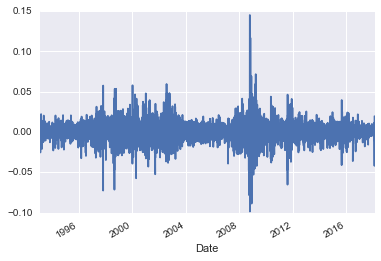

In [13]:
spy_till_feb_2018_close['close_pct_change'].plot()

In [17]:
spy_till_feb_2018_close['pct_chg_z-score'] = (spy_till_feb_2018_close['close_pct_change'] - spy_till_feb_2018_close['close_pct_change'].mean())/np.std(spy_till_feb_2018_close['close_pct_change'])      

In [16]:
spy_till_feb_2018_close['close_pct_change'].dropna().describe()

count    6301.000000
mean        0.000429
std         0.011568
min        -0.098448
25%        -0.004319
50%         0.000669
75%         0.005774
max         0.145198
Name: close_pct_change, dtype: float64

In [31]:
spy_till_feb_2018_close

,Adj Close,close_pct_change,pct_chg_z-score
Date,,,
1993-01-29,27.466887,NaN,NaN
1993-02-01,27.662252,0.007113,0.577812
1993-02-02,27.720823,0.002117,0.145950
1993-02-03,28.013882,0.010572,0.876855
1993-02-04,28.131090,0.004184,0.324609
1993-02-05,28.111523,-0.000696,-0.097234
1993-02-08,28.111523,0.000000,-0.037101
1993-02-09,27.916172,-0.006949,-0.637870
1993-02-10,27.955238,0.001399,0.083881


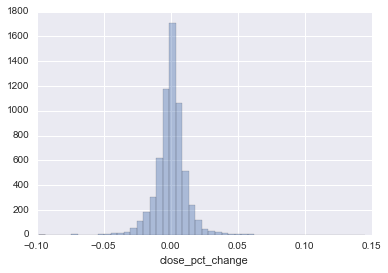

In [29]:
sns.distplot(spy_till_feb_2018_close.close_pct_change.dropna(), kde=False, rug=False);